<h1 style="text-align: center;"> Preprocesamiento </h1>
<h1 style="text-align: right; font-size: 24px; margin-right: 10px;">Guillermo Díaz Aguado</h1>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Introducción
Uno de los factores más importantes a la hora de crear nuestro modelo de aprendizaje es que nuestros datos tengan información de calidad y una buena cantidad. Es por ello que vamos a indicar una serie de pasos que se deberían hacer *SIEMPRE* antes de empezar a crear nuestro modelo. 

## Gestión de valores perdidos
A la hora de recopilar datos pueden ocurrir muchos fallos (o no tienen por qué ser fallos) que hagan que nuestro dataset tengan valores perdidos, nulos. Estos datos se pueden deber a decenas de factores como: 
| Tipo de dato faltante | Descripción |
|------------------------|-------------|
| Simplemente se han perdido aleatoriamente al llegar a nuestra mano | Generalmente debido a la aleatoriedad, con lo que no afectan en gran medida |
| Se han dejado sin contestar | En casos como estos nos pueden dar información extra, ya que es posible que se hayan dejado sin contestar debido a factores que influyen sobre la variable dependiente. Una buena solución a estos elementos es crear una nueva variable dicotómica que nos indique si han dejado sin contestar o no dicho espacio |

Desafortunadamente, estos valores son casi imposibles de manejar para la mayoria de las herramientas computacionales, es por ello que debemos tratarlas antes. Los valores perdidos se pueden mostrar de infinitas formas, lo optimo sería que nos diesen alguna pista al recibir el datset, pero sabemos que eso muchas veces es imposible, por lo que muestro algunos ejemplos:
* Valor NaN
* Valor null
* Celda vacía
* Celda con caracteres en una columna con valores numericos
* Caracteres como "?"
* Valores excesivamente altos como 9999 o valores extraños como 0 o -1


## Preprocesamiento de variables categoricas.
### Introducción 
Muchas librerias necesitan que las clases de las variables categóricas se codifiquen como valores enteros. Aunque ya muchas librerias convierten algunos de esots tipos de variables a valores enteros (de forma interna), se considera buena práctica hacerlo nosotros manualmente.
Tendremos 2 tipos de variables categoricas.

| Nombre | Descripción | Ejemplo |
| ------ | ----------- | ------- |
| <span style="color:lightblue;">Variable ordinal</span>| Son variables que tienen un orden, pero que en la base de datos no se muestra| L>M>S>XS|
| <span style="color:lightblue;">Variable nominal</span> | Son variables que no se pueden ordenar. Solo se puede ser de un tipo o de varios | Colores |

### Variables ordinales 
Para poder trabajar con ellas sería necesario convertirlos a números enteros. 
La relación entre todas las etiquetas se debe poder expresar como una ecuación. Esta relación se debería indicar en el enunciado o se debe encontrar. 
$$
\text{Ejemplo:  } \text{XL}= \text{L}+2 = \text{M}+5 = \text{S}+7 \quad \Rightarrow \quad 
\left\{
\begin{array}{l}
  XL = 8 \\
  L = 6 \\
  M = 3 \\
  S = 1
\end{array}
\right.
$$
Para poder realizar el cambio, tan solo habría que aplicar un *mapping* a toda la columna, usando un diccionario de referencia. 

In [21]:
df = pd.DataFrame({"size":["L", "M", "L", "XL", "S"]})

size_mapping = {"XL": 8,
                "L": 6,
                "M": 3,
                "S": 1}

df["size"] = df["size"].map(size_mapping)
df

,size
0,6
1,3
2,6
3,8
4,1


### Variables nominales. 
Hay dos formas de realizar el preprocesamiento.
* **LabelEncoder**
* **One Hot Encoder**
#### LabelEncoder.
Sabiendo que son etiquetas que no siguen ningún orden, podemos darle un valor aleatorio a cada etiqueta y ya se quedaría como números enteros, tan solo debemos tratarlos después como "etiquetas" en números enteros.
* <span style="color:salmon;">Desventajas</span>
    * En el caso de que se pueda ser de varias clases a la vez, sus valores númericos no se podrán "sumar", ya que le hemos dado valores arbitrarios.
    * No se pueden usar como valores en regresiones, ya que al ser valores arbitrarios estariamos asumiendo que un valor es mayor que otro, cuando, en realidad, simplemente son distintas clases.
* <span style="color:salmon;">Ventajas</span>
    * Ocupa solo 1 columna, con lo que no se necesitas más espacio de almacenamiento ni tarda tanto en formarse el modelo

##### Ejemplo de LabelEncoder.

In [22]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Supongamos que tenemos una columna de tallas
df = pd.DataFrame({
    'size': ['L', 'M', 'L', 'XL', 'S', 'M', 'S']
})

# Creamos el codificador
encoder = LabelEncoder()

# Aplicamos el codificador
df['size_encoded'] = encoder.fit_transform(df['size'])

# Mostramos el resultado
df

,size,size_encoded
0,L,0
1,M,1
2,L,0
3,XL,3
4,S,2
5,M,1
6,S,2


#### One Hot Encoding.
Otro proceso sería generando una **variable dummy** para cada una de las clases de estas variables. Donde daremos el valor "1" si pertenece a la clase de esa columna y "0" en caso contrario.
Es importante destacar que en el caso de *variables nominales exclusivas* (son aquellas que solo pueden ser de 1 clase) **se debe eliminar 1 de las posibles columnas nuevas, ya que si tienes las demás columnas de las clases, la última se puede deducir a partir de estas**. En caso de no eliminarse, habrá <span style="color:salmon;">COLINEALIDAD</span>.

* <span style="color:salmon;">Ventajas</span>
    * Se puede usar en problemas de regresión.
    * Puedes codificar variables que pertenecen a varias clases.
* <span style="color:salmon;">Desventajas</span>
    * Generarás muchas nuevas columnas, que deberán ser guardadas y procesadas -> Mayor espacio y tiempo


##### Ejemplo de One Hot Encoding
La forma más directa de hacerlo es usando la función de pandas **get_dummies**

In [23]:
df_encoded = pd.get_dummies(df, columns=["size"])
df_encoded

,size_encoded,size_L,size_M,size_S,size_XL
0,0,True,False,False,False
1,1,False,True,False,False
2,0,True,False,False,False
3,3,False,False,False,True
4,2,False,False,True,False
5,1,False,True,False,False
6,2,False,False,True,False


## Escalado de las variables independientes.
El escalado de los datos es un punto tan importante, que para algunos modelos estadisticos es NECESARIO aplicar una transformación de escalado para que este algoritmo funcione.

Prácticamente siempre habrá que usar un escalado, que de manera general, no empeora el modelo. Pero, ¿Para que sirve?
    Pongamonos en el caso que queremos hacer un modelo con estos rangos de variables independientes: $X_1:[0-100]$ y $X_2:[1.000-1.000.000]$.
    Seguramente la variable $X_2$ tendrá un mayor peso en el modelo, debido únicamente a la escala de esta variable y no debido a la posible correlación de la variable predictora $X_2$ con la variable dependiente Y.





<p style="color: lightblue;">El método usado para todas las posibles tranformaciones de escalado en Sklearn sigue los mismos pasos</p>


| Acción                                                         | Código                                   |
|---------------------------------------------------------------|------------------------------------------|
| Generas el objeto del escalador | `X_new = StandardScaler()`               |
| Transformas las variables con el método<span style="color:salmon;">  .fit_transform</span> | `X_new.fit_transform(X)`                |

<span style="color:lightblue;">En caso de tener *train* y *test*</span>
|                                                         |                                  |
|---------------------------------------------------------------|------------------------------------------|
| Generas el objeto  | `mms = MinMaxScaler()`               |
| Usamos los datos de test para calcular los parametros del escalado (<span style="color:salmon;">  .fit</span>) y transformamos esos datos (<span style="color:salmon;">  transform</span>)-><span style="color:salmon;">  .fit_transform</span> | `X_train_scaled = mms.fit_transform(X_train)`                |
| Transformamos los datos de test pero con los parametros del training | `X_test_scaled = mms.transform(X_train)`|

### Tipos de escalado
| Técnica | Descripción | Fórmula |
|--------|-------------|---------|
| <span style="color:lightblue;">Normalización</span> (MinMaxScaler) | Se reescalan los datos en un rango de 0 a 1. Donde 0 es el mínimo y 1 es el máximo. | $x_{\text{norm}}^{(i)} = \frac{x^{(i)} - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}$ |
| <span style="color:lightblue;">Estandarización </span> (StandardScaler) | <p style="text-align:center;">Hace que los datos se queden con media=0 y std.desv=1 </p> <div style="text-align: center;font-size:24px;">↓</div>  <p style="color:lightblue;text-align: center;">Mantiene la forma original de los datos, tan solo los "centra" y "estira" </p><div style="text-align: center;font-size:24px;">↓</div>  <p style="color:salmon; text-align: center;"> Los outliers influyen mucho </p>| $x_{\text{std}}^{(i)} = \frac{x^{(i)} - \mu_{\text{x}}}{\sigma_{\text{x}}}$ |
| <span style="color:lightblue;">QuantileTransformer </span> (QuantileTransformer) | <p style="text-align:center;">Asigna cauntiles a cada valor y crea una distribución normal(por defecto media=0, std.desv=1) </p> <div style="text-align: center;font-size:24px;">↓</div>  <p style="color:lightblue;text-align: center;"> Cambia la distribución </p><div style="text-align: center;font-size:24px;">↓</div>  <p style="color:salmon; text-align: center;"> Los outliers se comprimen </p> <div style="text-align: center;font-size:24px;">↓</div>  <p style="color:salmon; text-align: center;"> Se elimina el sesgo por distribución o distorsión </p> | <img src="Imagenes_Preprocesamiento/Representacion_QuantileTransformer.png" alt="Quantile Transformer" width="400"/>
|



### Ejemplo 1 de uso en Scikit Learn

In [13]:
df = pd.read_csv("Datasets_Preprocesamiento/drawndata1.csv")
df.head()

,x,y,z
0,58.080365,225.699042,a
1,238.867357,247.456645,a
2,156.218212,286.588782,a
3,262.004361,284.251445,a
4,185.243183,308.187571,a


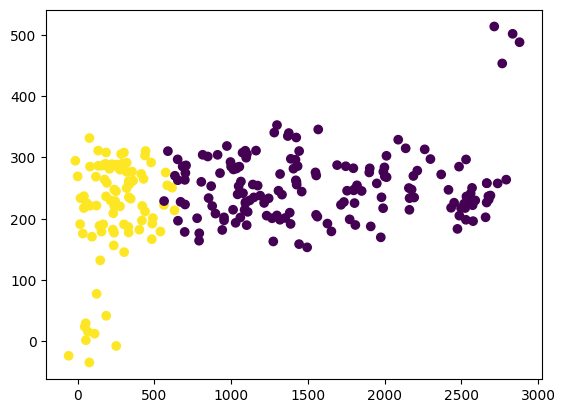

In [14]:
X = df[["x", "y"]]
Y = df["z"] == "a" # Hago que la serie Y sea True si z=a y false en caso contrario.
plt.scatter(X["x"], X["y"], c=Y)

Como podemos ver en los datos anteriores, existen varios problemas:
* La escala:
    * El eje x va de 0 a 3000
    * El eje y va de 0 a 500
    * Esto puede provocar que los pesos de las predicciones dependan de las escalas de estas, cosa que no queremos.
* Los valores atípicos:
    * Existen valores atípicos que están lejos de donde deberían estar.


Si usamos el StandardScaler podemos resolver el problema de la *escala*, pero si usamos el Quantile transformer podemos resolver el problema de la *escala* y el problema de los *valores atípicos*.

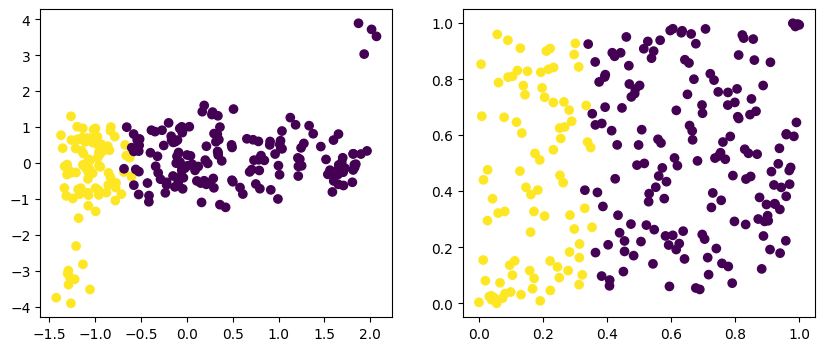

In [15]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer

X_standard = StandardScaler().fit_transform(X)
X_quantile = QuantileTransformer(n_quantiles=100).fit_transform(X) # Pongo el numero de quantiles para que no salga el Warning

fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].scatter(X_standard[:, 0], X_standard[:, 1], c=Y)
ax[1].scatter(X_quantile[:, 0], X_quantile[:, 1], c=Y)

Ahora vamos a usar un ejemplo usando la predicción de **KNNeighbours**, donde podremos notar que mas robusto usar uno de estos dos métodos

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier


def plot_output(scaler, X, y):
    pipe = Pipeline([
        ("scale", scaler),
        ("model", KNeighborsClassifier(n_neighbors=20, weights='distance'))
    ])

    X = X.to_numpy()
    y = y.to_numpy()

    pred = pipe.fit(X, y).predict(X)

    plt.figure(figsize=(9, 3))
    plt.subplot(131)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title("Original Data")
    plt.subplot(132)
    X_tfm = scaler.transform(X)
    plt.scatter(X_tfm[:, 0], X_tfm[:, 1], c=y)
    plt.title("Transformed Data")
    plt.subplot(133)
    X_new = np.concatenate([
        np.random.uniform(0, X[:, 0].max(), (5000, 1)), 
        np.random.uniform(0, X[:, 1].max(), (5000, 1))
    ], axis=1)
    y_proba = pipe.predict_proba(X_new)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=y_proba[:, 1], alpha=0.7)
    plt.title("Predicted Data")

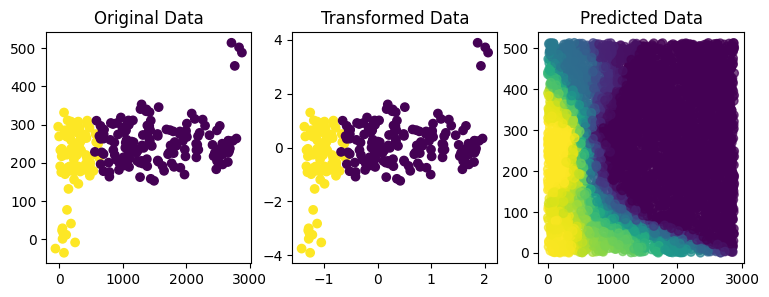

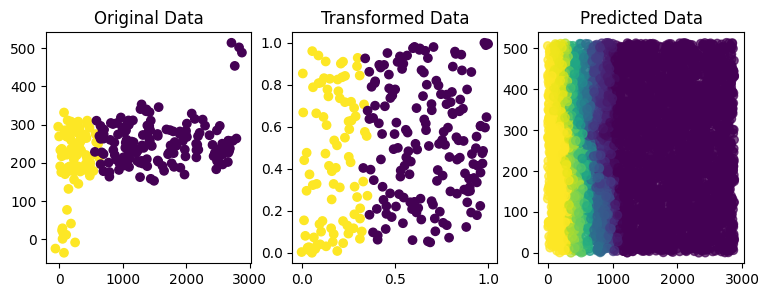

In [19]:
plot_output(StandardScaler(), X, Y)
plot_output(QuantileTransformer(n_quantiles=100), X, Y)

### Ejemplo 2 División de muestras no lineales.

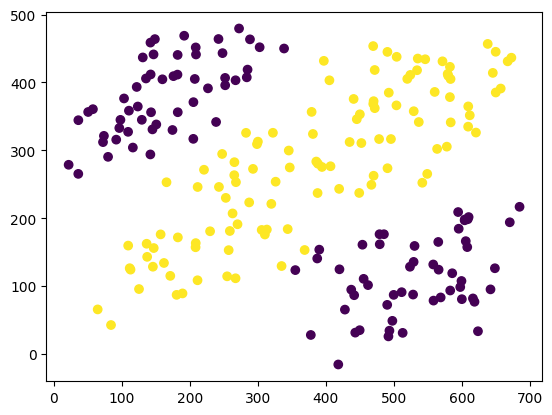

In [20]:
df = pd.read_csv("Datasets_Preprocesamiento/drawndata2.csv")
X = df[["x", "y"]].values   # Esta vez voy a usar arrays de numpys en vez de usar dataframes
Y = df["z"] == "a" 
plt.scatter(X[:, 0], X[:, 1], c=Y)